In [1]:
import sys
sys.path.append("/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis")

import pandas as pd
import numpy as np
import smote_variants as sv
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import preprocessing

from svSynthsonic import synthsonic
from Evaluation import plot_oversampling, evaluate_oversamplers, writetodict

In [2]:
path = "/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis/Datasets/"
credit_fraud = path+"credit_fraud.csv"
credit_fraud = pd.read_csv(credit_fraud)

In [3]:
credit_fraud_dict = writetodict(credit_fraud, "credit_fraud")
X,y = credit_fraud_dict['data'],credit_fraud_dict['target']

In [22]:
X.shape

(284807, 29)

In [4]:
s = synthsonic(distinct_threshold=-1)

n_quantiles (500) is greater than the total number of samples (492). n_quantiles is set to num samples.


minority class 1, min dataset (492, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 907.12it/s]
Generating for node: 20: 100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 564229 but corresponding boolean dimension is 568630

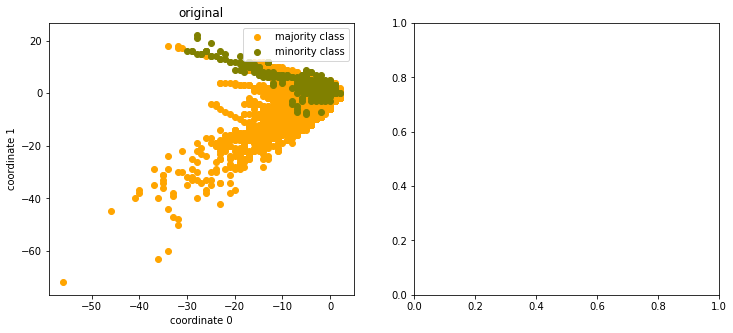

In [6]:
plot_oversampling(X,y,[s])

In [10]:
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf

class tsynthsonic(sv.OverSampling) :
    
    def __init__(self,
                 proportion=1.0,
                 distinct_threshold=100,
                 n_jobs=1, 
                 random_state=None) :
        
        
        super().__init__()
        
        self.check_greater_or_equal(proportion, "proportion", 0)
        self.check_n_jobs(n_jobs, 'n_jobs')

        self.proportion = proportion
        self.distinct_threshold = distinct_threshold
        self.n_jobs = n_jobs
        self.random_state = random_state
        
    @classmethod
    def parameter_combinations(cls, raw=False) :
        
        parameter_combinations = {'proportion': [0.1, 0.25, 0.5, 0.75,
                                                 1.0, 1.5, 2.0]}
        
        return cls.generate_parameter_combinations(parameter_combinations, raw)
    
    def sample(self, X, y) :
    
        # Find minority class
        # self.find_minority(X,y)
        self.class_label_statistics(X, y)
        
        self.X_min = X[y == self.min_label]
        
        print(f"minority class {self.min_label}, min dataset {self.X_min.shape}")
        
        # fit model
        kde = KDECopulaNNPdf(distinct_threshold=self.distinct_threshold)
        kde = kde.fit(self.X_min)
        
        # determine n_samples
        self.n_to_sample = self.det_n_to_sample(self.proportion,
                                           self.class_stats[self.maj_label],
                                           self.class_stats[self.min_label])

        
        
        # sample
        x1 = kde.sample_no_weights(n_samples=self.n_to_sample)
        
        X_samp = np.vstack([X,x1])
        y_samp = np.hstack([y, [self.min_label]*self.n_to_sample])
        
        return X_samp, y_samp
    
        
        def get_params(self) :
            
            return {'proportion': self.proportion, 
                'n_jobs': self.n_jobs,
                'distinct_threshold': self.distinct_threshold,
                'random_state': self.random_state}

In [11]:
st = tsynthsonic(distinct_threshold=-1)

In [12]:
t,u = st.sample(X,y)

n_quantiles (500) is greater than the total number of samples (492). n_quantiles is set to num samples.


minority class 1, min dataset (492, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 912.48it/s]
Generating for node: 20: 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


In [14]:
t.shape

(564229, 29)

In [15]:
X.shape

(284807, 29)

In [16]:
284807*2

569614